<a href="https://colab.research.google.com/github/CloudInnovator/Fast_ai_tutorials/blob/main/Chapter_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#If running on Colab remember to go to Runtime -> Change runtime type -> select GPU to run faster
#Check if GPU is enable
import torch
print("GPU Availabled:",torch.cuda.is_available())
#id first_training
#caption Results from the first training
# CLICK ME
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

GPU Availabled: True


/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.180947,0.014073,0.004060,00:54


epoch,train_loss,valid_loss,error_rate,time
0,0.069986,0.001056,0.000000,00:51


In [ ]:
import ipywidgets as widgets
#hide_output
uploader = widgets.FileUpload()
uploader

FileUpload(value={}, description='Upload')

In [ ]:
img = PILImage.create(uploader.data[0])
is_cat,_,probs = learn.predict(img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

Is this a cat?: True.
Probability it's a cat: 1.000000


In [ ]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)
     

epoch,train_loss,valid_loss,time
0,2.861207,2.384369,00:01


epoch,train_loss,valid_loss,time
0,1.870157,1.772900,00:01
1,1.602362,1.258868,00:01
2,1.463061,1.184108,00:01
3,1.324950,0.967941,00:02
4,1.179307,0.822965,00:01
5,1.058187,0.769571,00:01
6,0.958966,0.763226,00:01
7,0.882360,0.755133,00:01


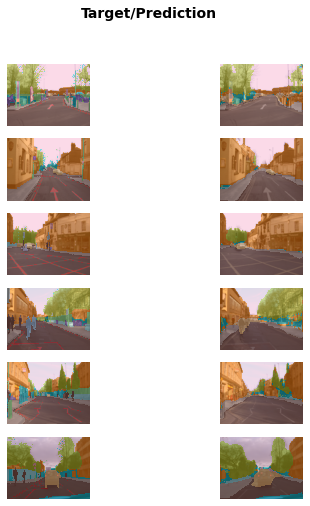

In [ ]:
learn.show_results(max_n=6, figsize=(7,8))

In [ ]:
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)
     

epoch,train_loss,valid_loss,accuracy,time
0,0.462480,0.411083,0.814720,03:33


epoch,train_loss,valid_loss,accuracy,time
0,0.304099,0.243486,0.900960,07:29
1,0.242160,0.230681,0.906560,07:29
2,0.185027,0.187556,0.929440,07:29
3,0.153936,0.195909,0.929040,07:29


In [ ]:
learn.predict("I really liked that movie!")

('pos', tensor(1), tensor([5.1407e-04, 9.9949e-01]))

In [2]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)


epoch,train_loss,valid_loss,accuracy,time
0,0.378409,0.374757,0.826321,00:08
1,0.368258,0.354869,0.834613,00:03
2,0.353714,0.354490,0.836609,00:03


In [3]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.355712,0.362243,0.829853,00:04
1,0.356472,0.354519,0.833845,00:03
2,0.350479,0.353404,0.833999,00:03


In [5]:
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(10)


epoch,train_loss,valid_loss,time
0,1.521656,1.401655,00:00


epoch,train_loss,valid_loss,time
0,1.371976,1.340334,00:00
1,1.265049,1.160836,00:00
2,1.017397,0.871625,00:00
3,0.794842,0.742599,00:00
4,0.695990,0.710629,00:00
5,0.645595,0.701758,00:00
6,0.627610,0.697724,00:00
7,0.599690,0.696800,00:00
8,0.605524,0.696066,00:00
9,0.609882,0.696043,00:01


In [6]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,40.0,35.0,4.0,3.976922
1,62.0,95.0,1.0,3.988201
2,21.0,68.0,3.0,3.237494
3,4.0,78.0,2.5,3.183811
4,64.0,3.0,4.0,3.994019
5,6.0,70.0,3.5,3.734352
6,7.0,100.0,5.0,4.007267
7,35.0,5.0,2.5,3.000198
8,49.0,13.0,4.0,3.586154
